**Вариант 2** с машинным обучением

In [1]:
!git clone -l -s https://github.com/Vova2808/Cresit_csv.git

Cloning into 'Cresit_csv'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 173.71 KiB | 3.54 MiB/s, done.


Импортируем все библеотеки и читаем csv файл

In [2]:
import pandas as pd
import sklearn as linear_model
import sklearn.model_selection as train_test_split
import sklearn.preprocessing as LabelEncoder
import seaborn as sns

df =  pd.read_csv('/content/Cresit_csv/Кредиты.csv')
df.head(10)

,Unnamed: 0,Имя покупателя,Дата выдачи,сумма займа,процент годовых,название банка
0,0,Жукова Екатерина,2019-10-25,2200,8.0,РосТоргПром банк
1,1,Зотов Артемий,2022-12-20,44000,0.5,Стальстрой банк
2,2,Пирогова София,2018-4-20,16600,1.0,ВАШ БАНК
3,3,Ковалев Иван,2022-8-18,19700,1.0,ВАШ БАНК
4,4,Юдин Михаил,2018-7-23,33000,0.5,Стальстрой банк
5,5,Сергеев Георгий,2021-6-9,15800,1.0,ВАШ БАНК
6,6,Антонова Василиса,2022-1-23,600,10.0,РосТоргПром банк
7,7,Белоусова Вероника,2018-7-18,42000,0.5,Стальстрой банк
8,8,Ковалев Михаил,2022-8-10,2700,8.0,Инвестбанк
9,9,Иванов Илья,2021-2-13,2200,8.0,РосТоргПром банк


включаем тёмную тему

In [3]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

В данных нет пустых значений

In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [5]:
df.isnull()

,Unnamed: 0,Имя покупателя,Дата выдачи,сумма займа,процент годовых,название банка
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
14995,False,False,False,False,False,False
14996,False,False,False,False,False,False
14997,False,False,False,False,False,False
14998,False,False,False,False,False,False


делаем hat map

<ipython-input-6-d560fe0aeb45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['сумма займа',	'процент годовых', 'название банка']].corr()


                 сумма займа  процент годовых
сумма займа         1.000000        -0.840373
процент годовых    -0.840373         1.000000


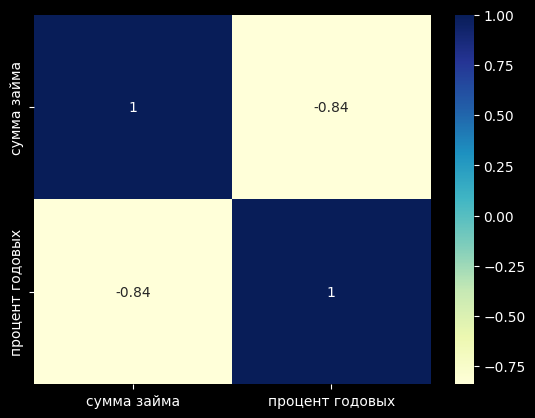

In [6]:
correlation_matrix = df[['сумма займа',	'процент годовых', 'название банка']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
print(correlation_matrix)

убираем таблички 'Unnamed: 0', 'Имя покупателя'потому что они не нужны и будут мешаться

In [7]:
df = df.drop(columns=['Unnamed: 0', 'Имя покупателя'])

разделяем год-месяц-день на три столбца

In [8]:
new_df = df['Дата выдачи'].str.split('-', expand=True)
new_df.columns = ['год', 'месяц', 'день']
df = pd.concat([df, new_df], axis=1)
df = df.drop('Дата выдачи', axis=1)

создаём хистаграмму

сумма займа          int64
процент годовых    float64
название банка      object
год                 object
месяц               object
день                object
dtype: object

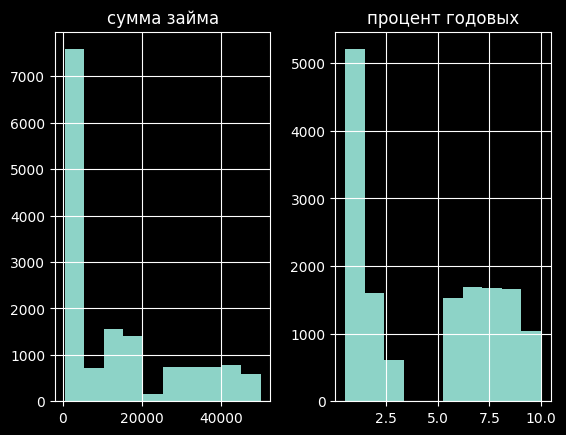

In [9]:
df.hist()
df.dtypes

In [10]:
df.groupby('название банка')['сумма займа'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
название банка,,,,,
ВАШ БАНК,3699,13933.306299,13900.0,19900,8000
Инвестбанк,3808,2697.452731,2700.0,5000,500
РосТоргПром банк,3772,2702.279958,2700.0,5000,500
Стальстрой банк,3721,36982.262833,37000.0,50000,25000


In [11]:
df.groupby('название банка')['процент годовых'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
название банка,,,,,
ВАШ БАНК,3699,1.76372,2.0,3.0,1.0
Инвестбанк,3808,7.86896,8.0,10.0,6.0
РосТоргПром банк,3772,7.86930,8.0,10.0,6.0
Стальстрой банк,3721,0.50000,0.5,0.5,0.5


In [12]:
df

,сумма займа,процент годовых,название банка,год,месяц,день
0,2200,8.0,РосТоргПром банк,2019,10,25
1,44000,0.5,Стальстрой банк,2022,12,20
2,16600,1.0,ВАШ БАНК,2018,4,20
3,19700,1.0,ВАШ БАНК,2022,8,18
4,33000,0.5,Стальстрой банк,2018,7,23
...,...,...,...,...,...,...
14995,25000,0.5,Стальстрой банк,2020,6,28
14996,11200,2.0,ВАШ БАНК,2018,2,10
14997,39000,0.5,Стальстрой банк,2022,6,6
14998,2000,9.0,Инвестбанк,2018,1,1


меняем в столбце название банка все названия ВАШ БАНК на 1 а остальные на 0 для оптимизации ML

In [13]:
df['название банка'] = df['название банка'].apply(lambda x: 1 if x =='ВАШ БАНК' else 0)

In [14]:
df

,сумма займа,процент годовых,название банка,год,месяц,день
0,2200,8.0,0,2019,10,25
1,44000,0.5,0,2022,12,20
2,16600,1.0,1,2018,4,20
3,19700,1.0,1,2022,8,18
4,33000,0.5,0,2018,7,23
...,...,...,...,...,...,...
14995,25000,0.5,0,2020,6,28
14996,11200,2.0,1,2018,2,10
14997,39000,0.5,0,2022,6,6
14998,2000,9.0,0,2018,1,1


Устанавливаем catboost через pip

In [15]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.3 MB/s eta 0:00:00


делим данные

In [16]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,train_size=0.6,random_state=42)
val, test = train_test_split(test,train_size=0.5,random_state=42)


In [17]:
len(train)

9000

In [18]:
len(test)

3000

In [19]:
len(val)

3000

In [20]:
train.columns

Index(['сумма займа', 'процент годовых', 'название банка', 'год', 'месяц',
       'день'],
      dtype='object')

даём catboost параметры

In [21]:
X = ['год','сумма займа', 'процент годовых']

cat_features = ['сумма займа']

y = ['название банка']

In [22]:
model = CatBoostRegressor(cat_features=cat_features,
                          early_stopping_rounds=200,
                          learning_rate = 0.03,
                          eval_metric='MAPE',
                          random_seed=42,
                          verbose=100)

In [23]:
# model = CatBoostRegressor(**parameters)

запускаем обучение и ждём пока все поколения пройдут

In [24]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.3643248	test: 0.3614713	best: 0.3614713 (0)	total: 49.2ms	remaining: 49.1s
100:	learn: 0.0177703	test: 0.0177482	best: 0.0177482 (100)	total: 337ms	remaining: 3s
200:	learn: 0.0012216	test: 0.0013368	best: 0.0013337 (196)	total: 895ms	remaining: 3.56s
300:	learn: 0.0005128	test: 0.0006602	best: 0.0006602 (300)	total: 1.25s	remaining: 2.91s
400:	learn: 0.0003723	test: 0.0005240	best: 0.0005240 (400)	total: 1.53s	remaining: 2.28s
500:	learn: 0.0001985	test: 0.0003532	best: 0.0003532 (500)	total: 1.88s	remaining: 1.87s
600:	learn: 0.0001135	test: 0.0002702	best: 0.0002702 (600)	total: 2.29s	remaining: 1.52s
700:	learn: 0.0000843	test: 0.0002419	best: 0.0002419 (700)	total: 2.57s	remaining: 1.1s
800:	learn: 0.0000711	test: 0.0002289	best: 0.0002289 (800)	total: 2.87s	remaining: 713ms
900:	learn: 0.0000512	test: 0.0002080	best: 0.0002080 (900)	total: 3.2s	remaining: 352ms
999:	learn: 0.0000381	test: 0.0001948	best: 0.0001948 (999)	total: 3.49s	remaining: 0us

bestTest = 0.000194

In [25]:
model.predict(test[X])

array([-2.74452970e-05, -1.87773913e-05, -3.51344112e-05, ...,
       -1.00141378e-05,  1.00003166e+00, -1.54745897e-06])

добовляем предсказание модели в столбик bank_pred

In [26]:
test['bank_pred'] = model.predict(test[X])

In [27]:
test

,сумма займа,процент годовых,название банка,год,месяц,день,bank_pred
9502,25000,0.5,0,2019,10,21,-0.000027
1851,900,10.0,0,2021,11,1,-0.000019
5933,2200,8.0,0,2020,7,22,-0.000035
12171,43000,0.5,0,2022,4,24,-0.000021
7342,33000,0.5,0,2022,4,14,-0.000021
...,...,...,...,...,...,...,...
6545,3900,7.0,0,2022,3,25,-0.000022
11566,700,10.0,0,2019,5,14,-0.000025
10959,2100,8.0,0,2021,5,14,-0.000010
1744,10000,2.0,1,2020,4,16,1.000032


убираем минус из столбца bank_pred

In [28]:
test['bank_pred'] = abs(test['bank_pred'])

In [29]:
test

,сумма займа,процент годовых,название банка,год,месяц,день,bank_pred
9502,25000,0.5,0,2019,10,21,0.000027
1851,900,10.0,0,2021,11,1,0.000019
5933,2200,8.0,0,2020,7,22,0.000035
12171,43000,0.5,0,2022,4,24,0.000021
7342,33000,0.5,0,2022,4,14,0.000021
...,...,...,...,...,...,...,...
6545,3900,7.0,0,2022,3,25,0.000022
11566,700,10.0,0,2019,5,14,0.000025
10959,2100,8.0,0,2021,5,14,0.000010
1744,10000,2.0,1,2020,4,16,1.000032


In [30]:
test.groupby('название банка')['bank_pred'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
название банка,,,,,
0,2290,0.000034,0.000026,0.001128,0.000001
1,710,0.999760,1.000005,1.000211,0.903515


In [31]:
test['выберет ли покупатель кредит от “ВАШ БАНК”'] = 0

выводим выберит ли клиент наш банк или нет

In [32]:
test['выберет ли покупатель кредит от “ВАШ БАНК”'] = test['bank_pred'].apply(lambda x: 'Клиент выберет кредит в ВАШ БАНК' if 0.9 <= x <= 2 else 'Клиент не выберет кредит в ВАШ БАНК')

In [33]:
test.head(50)

,сумма займа,процент годовых,название банка,год,месяц,день,bank_pred,выберет ли покупатель кредит от “ВАШ БАНК”
9502,25000,0.5,0,2019,10,21,0.000027,Клиент не выберет кредит в ВАШ БАНК
1851,900,10.0,0,2021,11,1,0.000019,Клиент не выберет кредит в ВАШ БАНК
5933,2200,8.0,0,2020,7,22,0.000035,Клиент не выберет кредит в ВАШ БАНК
12171,43000,0.5,0,2022,4,24,0.000021,Клиент не выберет кредит в ВАШ БАНК
7342,33000,0.5,0,2022,4,14,0.000021,Клиент не выберет кредит в ВАШ БАНК
1911,41000,0.5,0,2019,3,15,0.000025,Клиент не выберет кредит в ВАШ БАНК
1714,4200,6.0,0,2018,1,25,0.000019,Клиент не выберет кредит в ВАШ БАНК
9322,900,10.0,0,2019,1,28,0.000025,Клиент не выберет кредит в ВАШ БАНК
1688,3500,7.0,0,2020,7,7,0.000027,Клиент не выберет кредит в ВАШ БАНК
1530,1500,9.0,0,2019,4,25,0.000037,Клиент не выберет кредит в ВАШ БАНК


In [34]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [35]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [36]:
error(test['название банка'],test['bank_pred'])

9.380812349235602e-05
115986959398.57246


**Оценка модели оценивается в диапазоне от 0 до 1, где более высокий балл указывает на лучшую Эффективности модели.**

**1 Эффективность на тестовой выборке**

In [37]:
r2_score = model.score(test[X], test[y])
print(f'Эффективности модели: {r2_score}')

Эффективности модели: 0.999978266143562


**2 Эффективность на обучающей выборке**

In [38]:
r2_score = model.score(train[X], train[y])
print(f'Эффективности модели: {r2_score}')

Эффективности модели: 0.9999999808478953


**3 Эффективность на валидационной выборке**

In [39]:
r2_score = model.score(val[X], val[y])
print(f'Эффективности модели: {r2_score}')

Эффективности модели: 0.999920925596767
